Setup

In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(keras)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input/fashionmnist")

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "fashion-mnist_test.csv"  "fashion-mnist_train.csv"
[3] "t10k-images-idx3-ubyte"  "t10k-labels-idx1-ubyte" 
[5] "train-images-idx3-ubyte" "train-labels-idx1-ubyte"

> Import data

The data are pictures, 28×28 px 

In [2]:
train.data <- read_csv("../input/fashionmnist/fashion-mnist_train.csv",
                       col_types = cols(.default = "i"))
test.data <- read_csv("../input/fashionmnist/fashion-mnist_test.csv",
                      col_types = cols(.default = "i"))

names(train.data)

dim(train.data)
dim(test.data)


[1] "label"    "pixel1"   "pixel2"   "pixel3"   "pixel4"   "pixel5"  
  [7] "pixel6"   "pixel7"   "pixel8"   "pixel9"   "pixel10"  "pixel11" 
 [13] "pixel12"  "pixel13"  "pixel14"  "pixel15"  "pixel16"  "pixel17" 
 [19] "pixel18"  "pixel19"  "pixel20"  "pixel21"  "pixel22"  "pixel23" 
 [25] "pixel24"  "pixel25"  "pixel26"  "pixel27"  "pixel28"  "pixel29" 
 [31] "pixel30"  "pixel31"  "pixel32"  "pixel33"  "pixel34"  "pixel35" 
 [37] "pixel36"  "pixel37"  "pixel38"  "pixel39"  "pixel40"  "pixel41" 
 [43] "pixel42"  "pixel43"  "pixel44"  "pixel45"  "pixel46"  "pixel47" 
 [49] "pixel48"  "pixel49"  "pixel50"  "pixel51"  "pixel52"  "pixel53" 
 [55] "pixel54"  "pixel55"  "pixel56"  "pixel57"  "pixel58"  "pixel59" 
 [61] "pixel60"  "pixel61"  "pixel62"  "pixel63"  "pixel64"  "pixel65" 
 [67] "pixel66"  "pixel67"  "pixel68"  "pixel69"  "pixel70"  "pixel71" 
 [73] "pixel72"  "pixel73"  "pixel74"  "pixel75"  "pixel76"  "pixel77" 
 [79] "pixel78"  "pixel79"  "pixel80"  "pixel81"  "pixel82"  "pixel83" 
 [85] "pixel84"  "pixel85"  "pixel86"  "pixel87"  "pixel88"  "pixel89" 
 [91] "pixel90"  "pixel91"  "pixel92"  "pixel93"  "pixel94"  "pixel95" 
 [97] "pixel96"  "pixel97"  "pixel98"  "pixel99"  "pixel100" "pixel101"
[103] "pixel102" "pixel103" "pixel104" "pixel105" "pixel106" "pixel107"
[109] "pixel108" "pixel109" "pixel110" "pixel111" "pixel112" "pixel113"
[115] "pixel114" "pixel115" "pixel116" "pixel117" "pixel118" "pixel119"
[121] "pixel120" "pixel121" "pixel122" "pixel123" "pixel124" "pixel125"
[127] "pixel126" "pixel127" "pixel128" "pixel129" "pixel130" "pixel131"
[133] "pixel132" "pixel133" "pixel134" "pixel135" "pixel136" "pixel137"
[139] "pixel138" "pixel139" "pixel140" "pixel141" "pixel142" "pixel143"
[145] "pixel144" "pixel145" "pixel146" "pixel147" "pixel148" "pixel149"
[151] "pixel150" "pixel151" "pixel152" "pixel153" "pixel154" "pixel155"
[157] "pixel156" "pixel157" "pixel158" "pixel159" "pixel160" "pixel161"
[163] "pixel162" "pixel163" "pixel164" "pixel165" "pixel166" "pixel167"
[169] "pixel168" "pixel169" "pixel170" "pixel171" "pixel172" "pixel173"
[175] "pixel174" "pixel175" "pixel176" "pixel177" "pixel178" "pixel179"
[181] "pixel180" "pixel181" "pixel182" "pixel183" "pixel184" "pixel185"
[187] "pixel186" "pixel187" "pixel188" "pixel189" "pixel190" "pixel191"
[193] "pixel192" "pixel193" "pixel194" "pixel195" "pixel196" "pixel197"
[199] "pixel198" "pixel199" "pixel200" "pixel201" "pixel202" "pixel203"
[205] "pixel204" "pixel205" "pixel206" "pixel207" "pixel208" "pixel209"
[211] "pixel210" "pixel211" "pixel212" "pixel213" "pixel214" "pixel215"
[217] "pixel216" "pixel217" "pixel218" "pixel219" "pixel220" "pixel221"
[223] "pixel222" "pixel223" "pixel224" "pixel225" "pixel226" "pixel227"
[229] "pixel228" "pixel229" "pixel230" "pixel231" "pixel232" "pixel233"
[235] "pixel234" "pixel235" "pixel236" "pixel237" "pixel238" "pixel239"
[241] "pixel240" "pixel241" "pixel242" "pixel243" "pixel244" "pixel245"
[247] "pixel246" "pixel247" "pixel248" "pixel249" "pixel250" "pixel251"
[253] "pixel252" "pixel253" "pixel254" "pixel255" "pixel256" "pixel257"
[259] "pixel258" "pixel259" "pixel260" "pixel261" "pixel262" "pixel263"
[265] "pixel264" "pixel265" "pixel266" "pixel267" "pixel268" "pixel269"
[271] "pixel270" "pixel271" "pixel272" "pixel273" "pixel274" "pixel275"
[277] "pixel276" "pixel277" "pixel278" "pixel279" "pixel280" "pixel281"
[283] "pixel282" "pixel283" "pixel284" "pixel285" "pixel286" "pixel287"
[289] "pixel288" "pixel289" "pixel290" "pixel291" "pixel292" "pixel293"
[295] "pixel294" "pixel295" "pixel296" "pixel297" "pixel298" "pixel299"
[301] "pixel300" "pixel301" "pixel302" "pixel303" "pixel304" "pixel305"
[307] "pixel306" "pixel307" "pixel308" "pixel309" "pixel310" "pixel311"
[313] "pixel312" "pixel313" "pixel314" "pixel315" "pixel316" "pixel317"
[319] "pixel318" "pixel319" "pixel320" "pixel321" "pixel322" "pixel323"
[325] "pixel324" "pixel325" "pixel326" "pixel327" "pixel328" "pixel329"
[331] "pixel330" "pixel331" "pixel332" "pi

[1] 60000   785

[1] 10000   785

In [3]:
# Data is 28 pixels big in width and height
img_rows <- img_cols <- 28

#' Data is transformed to matrix (because they are easier indexable) and  pixels
#' are separated from labels.
x_train <- as.matrix(train.data[, 2:dim(train.data)[2]])
y_train <- as.matrix(train.data[, 1])
# Unflattening the data.
dim(x_train) <- c(nrow(x_train), img_rows, img_cols, 1) 

# The same for test set.
x_test <- as.matrix(test.data[, 2:dim(train.data)[2]])
y_test <- as.matrix(test.data[, 1])
dim(x_test) <- c(nrow(x_test), img_rows, img_cols, 1)



In [4]:
clothes.labels <- c("Tshirt_top", "Trouser", "Pullover", "Dress", "Coat",
                    "Sandal", "Shirt", "Sneaker", "Bag", "AnkleBoot")

Plotting picture

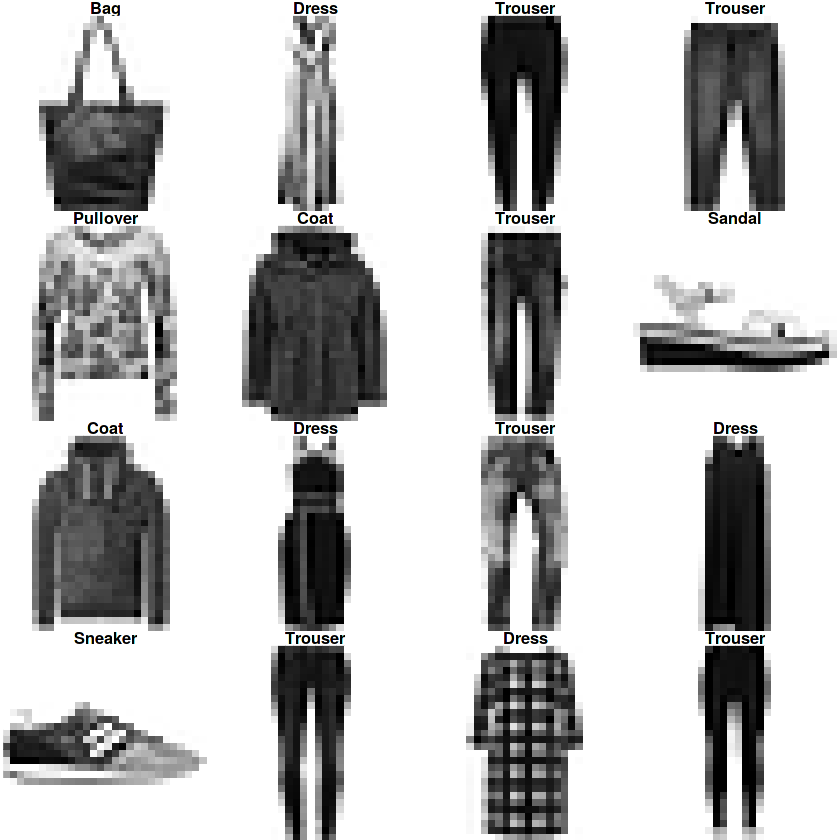

In [5]:
# Function to rotate matrices
rotate <- function(x) t(apply(x, 2, rev))

# Function to plot image from a matrix x
plot_image <- function(x, title = "", title.color = "black") {
  dim(x) <- c(img_rows, img_cols)
  image(rotate(rotate(x)), axes = FALSE,
        col = grey(seq(1, 0, length = 256)),
        main = list(title, col = title.color))
}

# We plot 16 cherry-picked images from the training set
par(mfrow=c(4, 4), mar=c(0, 0.2, 1, 0.2))
for (i in 1:16) {
  nr <- i * 10
  plot_image(x_train[nr,,,1],
             clothes.labels[as.numeric(train.data[nr, 1] + 1)])
}

Convolutional

In [6]:
# Normalize values from [0, 255] to [0, 1] interval
x_train <- x_train / 255
x_test <- x_test / 255

# Convert class vectors to binary class matrices
num_classes <- 10
y_train <- to_categorical(y_train, num_classes)
y_test <- to_categorical(y_test, num_classes)


In [7]:
input_shape <- c(img_rows, img_cols, 1)


In [8]:
model <- keras_model_sequential()
model %>%
  layer_conv_2d(filters = 32, kernel_size = c(3,3), activation = 'relu',
                input_shape = input_shape) %>%
  layer_dropout(rate = 0.5) %>%
  layer_conv_2d(filters = 32, kernel_size = c(3,3), activation = 'relu') %>%
  layer_flatten() %>%
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dropout(rate = 0.5) %>%
  layer_dense(units = num_classes, activation = 'softmax')

In [9]:
# compile model
model %>% compile(
  loss = loss_categorical_crossentropy,
  optimizer = optimizer_adam(),
  metrics = c('accuracy')
)

In [10]:
model

Model
Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d (Conv2D)                     (None, 26, 26, 32)              320         
________________________________________________________________________________
dropout (Dropout)                   (None, 26, 26, 32)              0           
________________________________________________________________________________
conv2d_1 (Conv2D)                   (None, 24, 24, 32)              9248        
________________________________________________________________________________
flatten (Flatten)                   (None, 18432)                   0           
________________________________________________________________________________
dense (Dense)                       (None, 128)                     2359424     
________________________________________________________________________________
dr

`geom_smooth()` using formula 'y ~ x'




Final epoch (plot to see history):
        loss: 0.2869
    accuracy: 0.8947
    val_loss: 0.2505
val_accuracy: 0.9082 

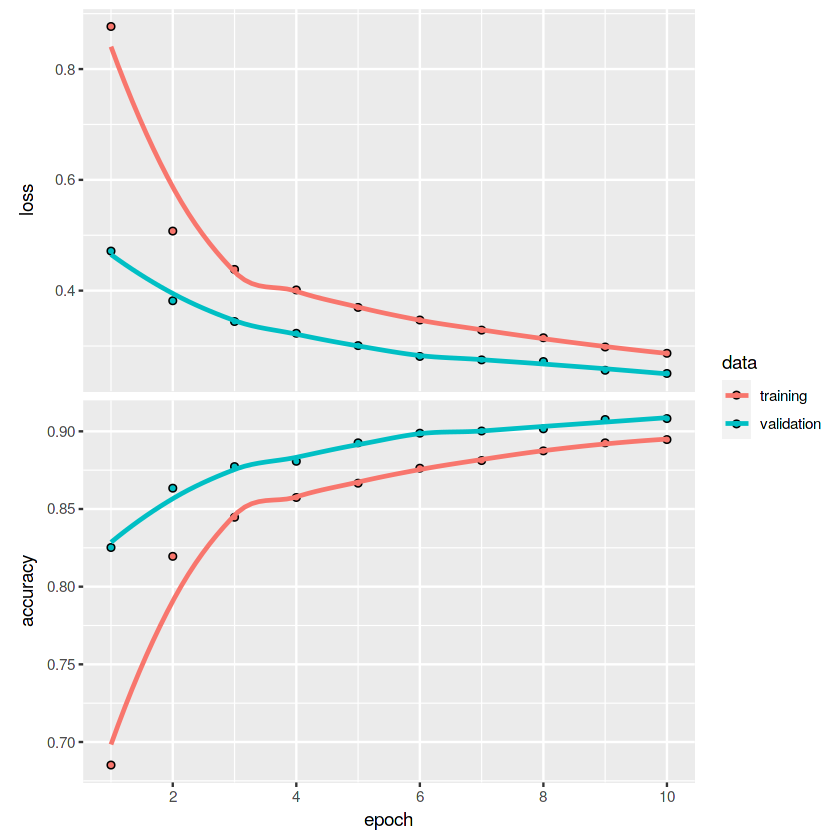

In [11]:
# train and evaluate
history <- model %>% fit(
  x_train, y_train,
  batch_size = 1024,
  epochs = 10,
  #verbose = 1,
  validation_data = list(x_test, y_test)
)
plot(history)
history

In [12]:
#confusion matrix
pred <- model %>% predict(x_test, batch_size = 128)
# identify maximum in each row (cats 1-10), substract 1 to get cats 0-9
# convert to matrix
y_pred <- to_categorical(apply(pred, 1, which.max) - 1, num_classes)

# Confusion matrix
CM = table(y_pred, y_test)
CM
# we can see, that there are 972 missclassified items (9.72%)
# there might be different numbers, in another run, but it should be somewhere near this number


      y_test
y_pred     0     1
     0 89082   918
     1   918  9082

In [13]:
#clothes.labels
labeled_predict <- data.frame(cbind(as.matrix(test.data[, 1]), y_pred))
names(labeled_predict) <- c('label', clothes.labels)
big_CM <- labeled_predict %>%
  group_by(label) %>%
  summarise(Tshirt_top = sum(Tshirt_top), 
            Trouser = sum(Trouser),
            Pullover = sum(Pullover),
            Dress = sum(Dress),
            Coat = sum(Coat),
            Sandal = sum(Sandal),
            Shirt = sum(Shirt),
            Sneaker = sum(Sneaker),
            Bag = sum(Bag),
            AnkleBoot = sum(AnkleBoot), .groups = 'keep'
           )
big_CM
# here we can see, that T-shirt and shirt are most often missclassified items.

label,Tshirt_top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,AnkleBoot
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,883,0,14,24,0,0,72,0,7,0
1,4,979,3,10,1,0,3,0,0,0
2,18,0,859,13,70,0,39,0,1,0
3,12,5,5,935,24,0,19,0,0,0
4,0,2,43,22,889,0,43,0,1,0
5,0,0,0,0,0,969,0,21,2,8
6,159,3,76,24,66,0,668,0,4,0
7,0,0,0,0,0,5,0,965,0,30
8,2,1,7,0,5,1,7,1,975,1


In [14]:
# row number of misclassified rows
missclas.rows <- which((apply(pred, 1, which.max) - 1) != test.data[, 1])
pred[y_pred == 0] <- 0  # probabilities for classification (other = 0)
# difference - table of misclassified rows containig 0s or probability of the guess
difference <- pred[missclas.rows, ]

In [15]:
# here we find 16 most wrong preddictions
max_diff <- rep(NA, 16)
for(i in 1:16){
    max_diff[i] <- which(difference == max(difference), arr.ind = TRUE)[,1]
    difference <- difference[-max_diff[i],]
}
labeled_predict <- labeled_predict[missclas.rows,]
labeled_predict[max_diff,]
small_CM <- labeled_predict[max_diff,] %>%
  group_by(label) %>%
  summarise(Tshirt_top = sum(Tshirt_top), 
            Trouser = sum(Trouser),
            Pullover = sum(Pullover),
            Dress = sum(Dress),
            Coat = sum(Coat),
            Sandal = sum(Sandal),
            Shirt = sum(Shirt),
            Sneaker = sum(Sneaker),
            Bag = sum(Bag),
            AnkleBoot = sum(AnkleBoot), .groups = 'keep'
           )
small_CM

,label,Tshirt_top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,AnkleBoot
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4452,0,0,0,0,0,0,0,0,0,1,0
2901,4,0,0,0,1,0,0,0,0,0,0
2314,6,1,0,0,0,0,0,0,0,0,0
7386,0,0,0,0,0,0,0,1,0,0,0
2129,0,0,0,0,1,0,0,0,0,0,0
6509,1,0,0,0,0,0,0,1,0,0,0
5213,0,0,0,0,0,0,0,1,0,0,0
5387,6,0,0,0,0,1,0,0,0,0,0
3750,9,0,0,0,0,0,0,0,1,0,0


label,Tshirt_top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,AnkleBoot
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,1,0,0,2,0,1,0
1,0,0,0,0,0,0,1,0,0,0
4,0,0,0,2,0,0,2,0,0,0
6,2,0,1,0,2,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,1,0,0


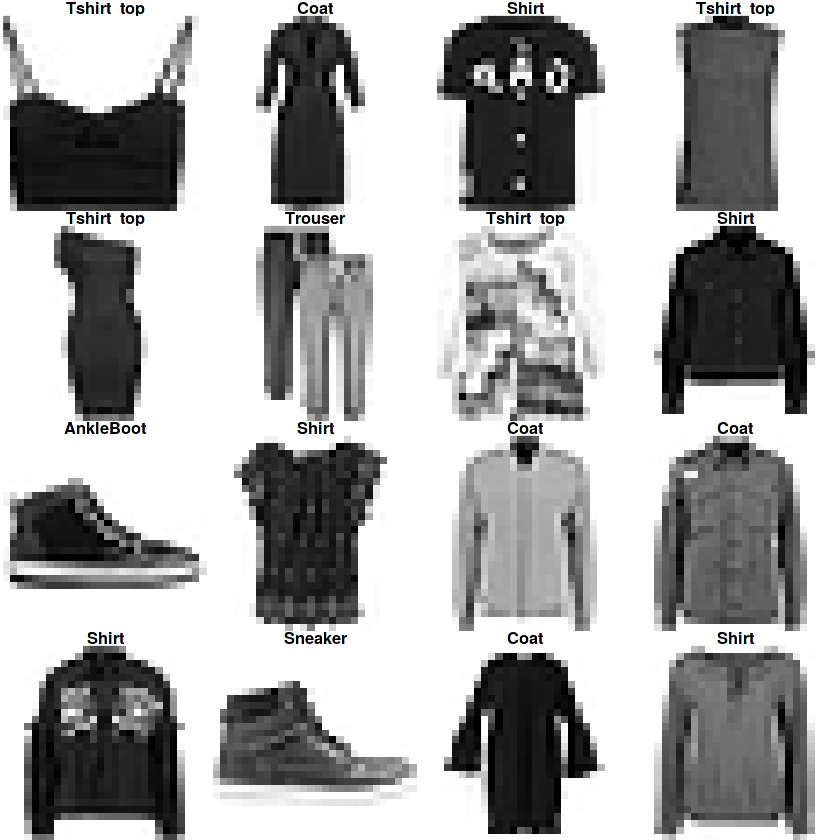

In [16]:
# Plot 16 most missclassified images
Mis_images<-rownames(labeled_predict[max_diff,])
par(mfrow=c(4, 4), mar=c(0, 0.2, 1, 0.2))
for (i in 1:16) {
    nr<-as.numeric(Mis_images[i])
    nr
    plot_image(x_test[nr,,,1],
             clothes.labels[as.numeric(test.data[nr, 1] + 1)])
}